# Self made Linear regression using gradient descent 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

* seed makes the following random commands to generate same set of random numbers everytime they are executed
*  2*np.random.rand(100, 1) → generates 100 random values between 0 and 2.
* y = 4 + 3 * X + np.random.randn ,generates target values y using the formula y = 4 + 3x + noise

In [4]:
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

* * STANDARDIZING below for one feature
  * With scaling:
  * All features contribute equally.
  * Faster and more stable convergence.

In [5]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

* adding bias term

In [6]:
df=pd.DataFrame(X_b)

In [7]:
df.head()

,0,1
0,1.0,-0.323112
1,1.0,1.623434
2,1.0,0.884509
3,1.0,0.434049
4,1.0,-1.061365


In [8]:
X_b.shape

(100, 2)

* np.ones((100, 1)) creates a column of 1s.

* np.c_[] combines two arrays column-wise.

In [9]:
theta = np.random.randn(2, 1)

In [10]:
theta

array([[0.01300189],
       [1.45353408]])

In [11]:
theta.shape

(2, 1)

* Initializes random weights to theta0 and theta1:

* 2 values (for intercept and slope)

* np.random.randn(2, 1) → gives random values from a normal distribution

In [12]:
learning_rate = 0.1
n_iterations = 1000
m = len(X_b) 

* `learning_rate` → controls how **big a step** we take when updating the weights
`n_iterations` → how many times we update the weights
`m` → number of training examples (100 in this case)

In [13]:
X_b.T.dot(X_b.dot(theta) - y)

array([[-680.70022082],
       [ -18.63632228]])

In [14]:
(2 / m) * X_b.T.dot(X_b.dot(theta) - y)

array([[-13.61400442],
       [ -0.37272645]])

In [15]:
cost_history=[]

In [16]:
for iteration in range(n_iterations):
    y_pred = X_b.dot(theta)
    error = y_pred - y
    gradients = (2/m) * X_b.T.dot(error)
    theta = theta - learning_rate * gradients
    
    # Cost
    cost = (1/m) * np.sum(error ** 2)
    cost_history.append(cost)

print("Learned parameters (theta):")
print(theta)

Learned parameters (theta):
[[6.8200041]
 [1.6398973]]


* gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
This line computes the gradient (slope of the cost function).
* X_b.dot(theta) → gives predicted values
* X_b.dot(theta) - y → difference between predicted and actual = error
* X_b.T.dot(...) → combines all those errors across all samples
* (2/m) → scales the gradient (standard in MSE gradient formula)
* theta = theta - learning_rate * gradients  -> the weight updation formula using learning rate

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

* `X_new` → two points to test: x = 0 and x = 2
- Adds bias column (just like training)
- Predicts `y` for those points using the learned `theta`
  

In [18]:
print(X_new)

[[0]
 [2]]


In [19]:
print(X_new_b)

[[1. 0.]
 [1. 2.]]


In [20]:
X_new_b[1,1]

np.float64(2.0)

In [21]:
print(theta)

[[6.8200041]
 [1.6398973]]


In [22]:
y_predict

array([[ 6.8200041],
       [10.0997987]])

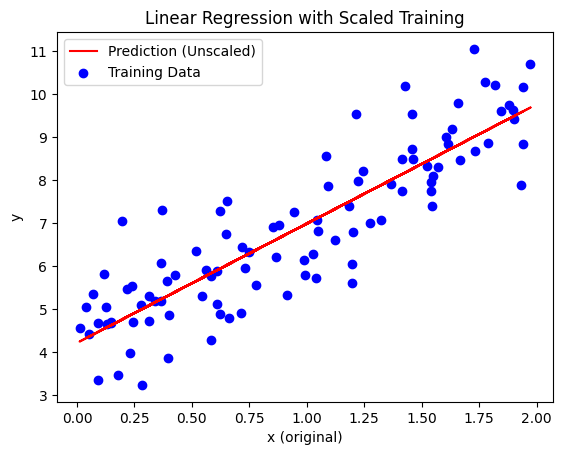

In [23]:
theta1_unscaled = theta[1][0] / X_std
theta0_unscaled = theta[0][0] - (X_mean * theta[1][0]) / X_std

# Predict using original X
y_pred_original = theta0_unscaled + theta1_unscaled * X

# Plot
plt.plot(X, y_pred_original, color='red', label='Prediction (Unscaled)')
plt.scatter(X, y, color='blue', label='Training Data')
plt.xlabel("x (original)")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression with Scaled Training")
plt.show()


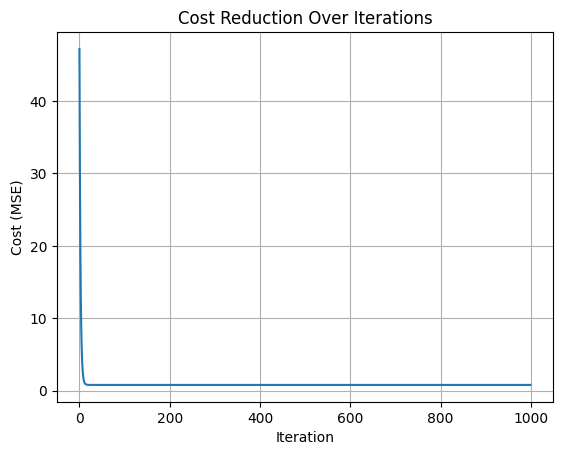

In [24]:
# Plotting cost vs iteration
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Iterations")
plt.grid(True)
plt.show()

* A curve starting high and slowly going down
* Eventually flattening — that’s when the model has learned enough
* If the line goes up → something’s wrong

In [25]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y,y_pred_original)
r2 = r2_score(y, y_pred_original)
print(mse)
print(r2)

0.8065845639670534
0.7692735413614223
